In [458]:
import numpy as np

In [459]:
x = np.array([[1,2],[3,4]])
invx = np.linalg.inv(x)
print(f"x:\n {x}")
print(f"x inverse:\n {invx}")
np.dot(x,invx).round()

x:
 [[1 2]
 [3 4]]
x inverse:
 [[-2.   1. ]
 [ 1.5 -0.5]]


array([[1., 0.],
       [0., 1.]])

In [460]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import pearsonr


In [461]:
df = pd.read_csv(r"G:\My Drive\4b - Courses\9 - Data Science\Datasets\ALL CSV FILES - 2nd Edition\Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [462]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [463]:
dg = pd.DataFrame(columns=["Predictor","R2 Train","R2 Test","P-Value","R"])
n = 0

In [464]:
y = df["sales"].values
def fit_and_plot_linear(X):
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=n)
    lreg = LinearRegression()
    lreg.fit(X_train,y_train)
    y_test_pred = lreg.predict(X_test)
    y_train_pred = lreg.predict(X_train)
    R2_test = r2_score(y_test,y_test_pred)
    R2_train = r2_score(y_train,y_train_pred)
    # score = lreg.score(X_test, y_test)
    
    r, p = pearsonr(X.values.reshape(-1),y)
    
    fig, ax = plt.subplots(figsize=[10,5])
    ax.scatter(X_train, y_train, color="green" ,label= "Train data")
    ax.scatter(X_test, y_test, color="orange" ,label= "Test data")
    ax.plot(X_train, y_train_pred,'--' ,color="black" ,label= "Train Prediction")
    ax.plot(X_test, y_test_pred, '-.' ,color="brown" ,label= "Test Prediction")
    ax.legend()
    ax.set_xlabel(f"{X.columns[0].title()}")
    ax.set_ylabel("Sales")
    return R2_train, R2_test, round(p,4), r
    

,Predictor,R2 Train,R2 Test,P-Value,R
0,Tv,0.588474,0.676315,0.0000,0.782224
1,Radio,0.356718,0.229817,0.0000,0.576223
2,Newspaper,0.064416,-0.021217,0.0011,0.228299


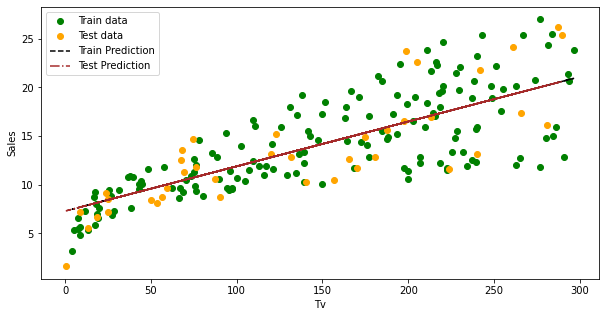

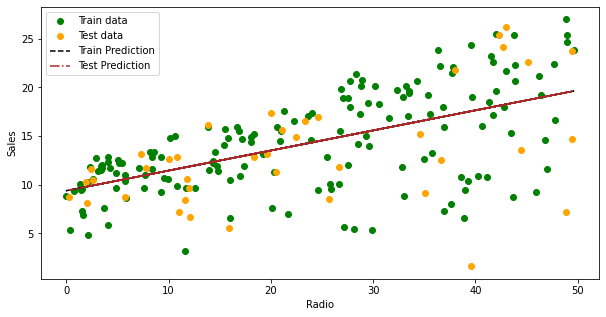

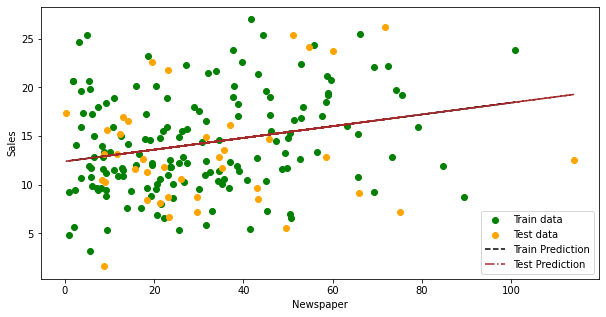

In [465]:
for i, xi in enumerate(df.columns[:-1]):
    X = df[[xi]]
    R2_train, R2_test, p, r = fit_and_plot_linear(X)
    dg.loc[i] = [xi.title(), R2_train, R2_test, p, r]
dg

In [466]:
def fit_and_plot_multiple(X):
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=n)
    mreg = LinearRegression()
    mreg.fit(X_train, y_train)
    y_test_pred = mreg.predict(X_test)
    y_train_pred = mreg.predict(X_train)
    R2_test = r2_score(y_test, y_test_pred) # same as mreg.score(X_test,y_test)
    R2_train = r2_score(y_train, y_train_pred)
    
    # To compute the R2 correlation coeff and statistical P-Value
    # global dv
    dv = pd.DataFrame(columns=["R2", "P-Value"])
    for col in X.columns:
        r, p = pearsonr(X[col],y)
        dv.loc[col] = [round(r,4), round(p,4)]
    # display(dv)

    # To compute the coefficient of each variable
    # global ds
    index = X.columns.tolist()
    index.insert(0,"Intercept")
    data = mreg.coef_.tolist()
    data.insert(0,mreg.intercept_)
    ds = pd.DataFrame(columns=["Coefficients"], index=index, data=data)
    # display(ds)

    # Joining the DataFrame tables using pd.merge or pd.concat
    df = pd.merge(ds,dv, how='left', left_on=ds.index, right_on=dv.index)
    df.rename(columns={"key_0":"Predictor"},inplace=True)
    display(df)

    return round(R2_train,4), round(R2_test,4)



In [467]:
Xm = df[df.columns[:-1]]
Xm
fit_and_plot_multiple(Xm)

,Predictor,Coefficients,R2,P-Value
0,Intercept,2.994893,NaN,NaN
1,TV,0.044584,0.7822,0.0000
2,radio,0.196497,0.5762,0.0000
3,newspaper,-0.002781,0.2283,0.0011


(0.9067, 0.8601)